In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('/Users/alenadenisova/Desktop/spam 2.csv', encoding = "ISO-8859-1") #sep='\t', header=None
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
len(data)

5572

In [10]:
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.columns = ['label', 'text']
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data.shape

(5572, 2)

In [13]:
print('Input Data has {} rows and {} columns'.format(len(data),len(data.columns)))

Input Data has 5572 rows and 2 columns


In [14]:
print('Out of {} rows {} are spam, {} are ham'.format(len(data), 
                                                     len(data[data['label']=='spam']),
                                                     len(data[data['label']=='ham'])))

Out of 5572 rows 747 are spam, 4825 are ham


In [15]:
print('Number of null in labels: {}'.format(data['label'].isnull().sum()))
print('Number of null in text: {}'.format(data['text'].isnull().sum()))

Number of null in labels: 0
Number of null in text: 0


In [16]:
pd.set_option('display.max_colwidth', 100)#чтобы печаталось больше символов колонке для предпросмотра

In [17]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


#Remove Punctuation:
input: text
output: text: ().join after char iteration

In [18]:
import string

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punct(text): #пробежаться по всем символам текста и оставить только те, кот. не явл.пунктуацией
    text_nopunct = "".join([char for char in text if char not in string.punctuation]) #без join вернет лист с character-ами 
    return text_nopunct

data['text_clean']= data['text'].apply(lambda x: remove_punct(x))
data.head()

,label,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


#Tokenization:
input: text
output: list of tokens

In [21]:
import re
def tokenize(text):
        tokens = re.split('\W+', text) #to split wherever it sees 1 or more non-word characters
        return tokens

data['text_tokenized'] = data['text_clean'].apply(lambda x: tokenize(x.lower()))
data.head()

,label,text,text_clean,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


In [22]:
'NLP'=='nlp'

False

#Removing stopwords:
input:  list of words
output: list of words

In [23]:
import nltk

stopwords=nltk.corpus.stopwords.words('English')

In [24]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

data['text_nostop'] = data['text_tokenized'].apply(lambda x: remove_stopwords(x))
data.head()

,label,text,text_clean,text_tokenized,text_nostop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


Stemming:

input: tokenized list

output: tokenized list

In [25]:
ps = nltk.PorterStemmer() #not so good for slang and abbreviations

In [26]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['text_stemmed'] = data['text_nostop'].apply(lambda x: stemming(x))
data.head()

,label,text,text_clean,text_tokenized,text_nostop,text_stemmed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"


In [27]:
wn = nltk.WordNetLemmatizer()

In [28]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['text_lemmatized'] = data['text_nostop'].apply(lambda x: lemmatizing(x))
data.head()

,label,text,text_clean,text_tokenized,text_nostop,text_stemmed,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"


In [29]:
data.head()

,label,text,text_clean,text_tokenized,text_nostop,text_stemmed,text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"


In [30]:
def clean_text_tolist(text): #>>to list
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #"".join#
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]  
    return text

#Count Vectorisation:

Input:1) raw text + передать в cv функцию очистки и токенизации c analyzer
      2) text_stemmed или text_lemmatized (список очищенных токенов)

Output: vectorized list

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer = clean_text_tolist) # если в скобки передать analyzer = clean_text, то можно применять на неочищенном text
X_counts = count_vect.fit_transform(data['text']) #просто fit не будет ничего делать,только прочитает

print(X_counts.shape)
print(count_vect.get_feature_names_out()) #напечатает все найденные уникальные слова из всего текста

(5572, 8060)
['' '0' '008704050406' ... 'ûïharri' 'ûò' 'ûówell']


In [ ]:
#5572 rows, 8060 columns

In [ ]:
#apply to smaller sample:

In [33]:
data_sample = data[0:20]
count_vect_sample = CountVectorizer(analyzer=clean_text_tolist)
X_counts_sample = count_vect_sample.fit_transform(data['text'])
print(X_counts_sample.shape)
print(count_vect_sample.get_feature_names_out())

(5572, 8060)
['' '0' '008704050406' ... 'ûïharri' 'ûò' 'ûówell']


***Print Document-Term Matrix:

In [34]:
X_counts_sample

<5572x8060 sparse matrix of type '<class 'numpy.int64'>'
	with 50183 stored elements in Compressed Sparse Row format>

In [35]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,8050,8051,8052,8053,8054,8055,8056,8057,8058,8059
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
wn.lemmatize('meanness')

'meanness'

In [37]:
wn.lemmatize('meaning')

'meaning'

In [38]:
ps.stem('run')

'run'

In [39]:
ps.stem('meanness')

'mean'

In [40]:
ps.stem('meaning')

'mean'

In [41]:
print(re.split('\W+',"some of the-words are+combined"))

['some', 'of', 'the', 'words', 'are', 'combined']


In [42]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [97]:
#N-gram vectorizing: (uses CountVectorizer from sklearn.feature_extraction.text)

In [43]:
def clean_text_totext(text): #>>to text
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #"".join#
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])  
    return text

In [44]:
data['cleaned_text'] = data['text'].apply(lambda x: clean_text_totext(x))
data.head()

,label,text,text_clean,text_tokenized,text_nostop,text_stemmed,text_lemmatized,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]",go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though


In [45]:
ngram_vect = CountVectorizer(ngram_range = (1,2)) # Unigrams and bigrams; 1,1-only unigrams, 2,2-only bigrams
X_counts = ngram_vect.fit_transform(data['cleaned_text']) #просто fit не будет ничего делать,только прочитает

print(X_counts.shape)
print(ngram_vect.get_feature_names_out())

(5572, 39168)
['008704050406' '008704050406 sp' '0089mi' ... 'ûò sound' 'ûówell'
 'ûówell done']


In [46]:
data_sample = data[0:20]
ngram_vect_sample = CountVectorizer(ngram_range = (2,2)) # Unigrams and bigrams; 1,1-only unigrams, 2,2-only bigrams
X_counts_sample = ngram_vect_sample.fit_transform(data_sample['cleaned_text']) #просто fit не будет ничего делать,только прочитает

print(X_counts_sample.shape)
print(ngram_vect_sample.get_feature_names_out())

(20, 226)
['09061701461 claim' '100 20000' '100000 prize' '11 month' '12 hour'
 '150 rcv' '150pday 6day' '16 tsandc' '20000 pound' '2005 text' '21st may'
 '4txtì¼120 poboxox36504w45wq' '6day 16' '81010 tc' '87077 eg'
 '87077 trywal' '87121 receiv' '87575 cost' '900 prize' 'aid patent'
 'alreadi say' 'amor wat' 'anymor tonight' 'appli 08452810075over18'
 'appli repli' 'around though' 'avail bugi' 'back id' 'bless time'
 'breather promis' 'brother like' 'buffet cine' 'bugi great'
 'call 09061701461' 'call mobil' 'caller press' 'callertun caller'
 'camera free' 'cash 100' 'chanc win' 'chg send' 'cine got' 'claim 81010'
 'claim call' 'claim code' 'click httpwap' 'click wap' 'co free'
 'code kl341' 'colour mobil' 'comp win' 'copi friend' 'cost 150pday'
 'crazi avail' 'credit click' 'cri enough' 'csh11 send' 'cup final'
 'custom select' 'darl week' 'date sunday' 'dont miss' 'dont think'
 'dont want' 'dun say' 'earli hor' 'eg england' 'eh rememb'
 'england 87077' 'england macedonia' 'enough t

In [47]:
X_counts_sample

<20x226 sparse matrix of type '<class 'numpy.int64'>'
	with 226 stored elements in Compressed Sparse Row format>

In [48]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df.columns = ngram_vect_sample.get_feature_names_out()
X_counts_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150 rcv,150pday 6day,16 tsandc,20000 pound,2005 text,...,wonder bless,wont take,word back,word claim,word thank,world la,wwwdbuknet lccltd,xxx std,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
#TfIdf Vectorizer: (uses TfidfVectorizer from sklearn.feature_extraction.text)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text_tolist)

X_tfidf = tfidf_vect.fit_transform(data['text']) #просто fit не будет ничего делать,только прочитает

print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(5572, 8060)
['' '0' '008704050406' ... 'ûïharri' 'ûò' 'ûówell']


In [51]:
data_sample = data[0:20]
tfidf_vect_sample = CountVectorizer(analyzer=clean_text_tolist) 
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['text']) #просто fit не будет ничего делать,только прочитает

print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names_out())

(20, 223)
['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150' '150pday' '16' '2' '20000' '2005' '21st' '3' '4'
 '4403ldnw1a7rw18' '4txtì¼120' '6day' '81010' '87077' '87121' '87575' '9'
 '900' 'aid' 'alreadi' 'amor' 'anymor' 'appli' 'around' 'avail' 'b' 'back'
 'bless' 'breather' 'brother' 'buffet' 'bugi' 'c' 'call' 'caller'
 'callertun' 'camera' 'cash' 'chanc' 'chg' 'cine' 'claim' 'click' 'co'
 'code' 'colour' 'comp' 'copi' 'cost' 'crazi' 'credit' 'cri' 'csh11' 'cup'
 'custom' 'darl' 'date' 'dont' 'dun' 'e' 'earli' 'eg' 'eh' 'england'
 'enough' 'entitl' 'entri' 'even' 'fa' 'feel' 'final' 'fine' 'free'
 'freemsg' 'friend' 'fulfil' 'fun' 'go' 'goalsteam' 'goe' 'gonna' 'got'
 'gota' 'grant' 'great' 'help' 'hey' 'hl' 'home' 'hor' 'hour' 'httpwap'
 'id' 'im' 'info' 'ive' 'jackpot' 'joke' 'jurong' 'k' 'kim' 'kl341' 'la'
 'lar' 'latest' 'lccltd' 'like' 'link' 'live' 'macedonia' 'make' 'may'
 'mell' 'membership' 'messag' 'minnaminungint' 'miss' 'mobil' 'month' 

In [52]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns = tfidf_vect_sample.get_feature_names_out()
X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150,150pday,...,wonder,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,å
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
#Feature Creation -length of the message(04_02):

In [53]:
data['text_len']=data['text'].apply(lambda x:len(x)-x.count(" ")) #to count all non-whitespace characters
data.head()

,label,text,text_clean,text_tokenized,text_nostop,text_stemmed,text_lemmatized,cleaned_text,text_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]",go jurong point crazi avail bugi n great world la e buffet cine got amor wat,92
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni,24
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...,128
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say,39
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though,49


In [120]:
#Feature creation - % of punctuation in the message:

In [54]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")), 3)*100

data['punct%'] = data['text'].apply(lambda x: count_punct(x))
data.head()

,label,text,text_clean,text_tokenized,text_nostop,text_stemmed,text_lemmatized,cleaned_text,text_len,punct%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]",go jurong point crazi avail bugi n great world la e buffet cine got amor wat,92,9.8
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...,128,4.7
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though,49,4.1


In [122]:
#Evaluate created features: >>04.03 >>overlayed hystogram

In [55]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

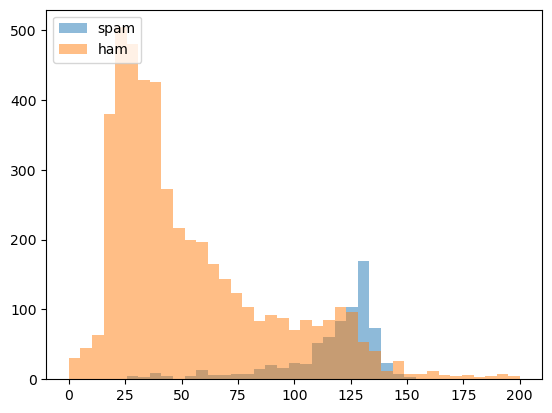

In [56]:
bins = np.linspace(0,200,40) #0-start point, 200 - max, 40 - how many cut points

pyplot.hist(data[data['label']=='spam']['text_len'], bins, alpha=0.5, label='spam') #only include rows with the label "spam";0.5-how dark the shading
pyplot.hist(data[data['label']=='ham']['text_len'], bins, alpha=0.5, label='ham') #normed = True-deprecated
pyplot.legend(loc = 'upper left')
pyplot.show()

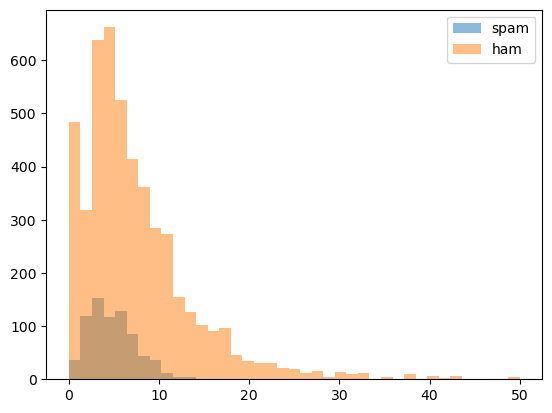

In [57]:
bins = np.linspace(0,50,40) #0-start point, 200 - max, 40 - how many cut points

pyplot.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, label='spam') #only include rows with the label "spam";0.5-how dark the shading
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, label='ham') #normed = True-deprecated
pyplot.legend(loc = 'upper right')
pyplot.show()

***Feature Transformation >>04.04

In [131]:
#useful to look at the full histograms, not only at normalized overlayed, like above
#Dramatic skew with a really long tail or a few outliers - good fit for transformation

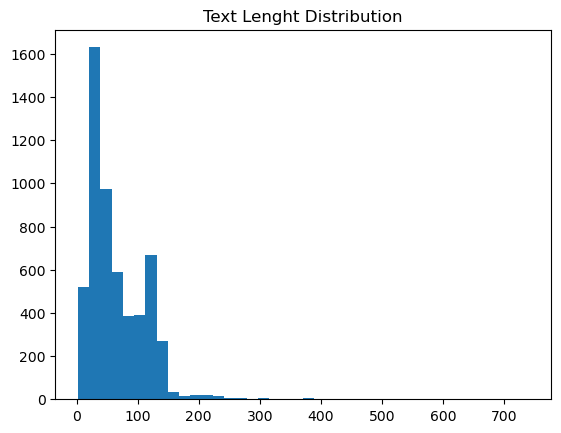

In [63]:
bins = np.linspace(0,200,40)

pyplot.hist(data['text_len'], bins) 
pyplot.title('Text Lenght Distribution')
pyplot.show() #>>this feature is not a good candidate for tranformation

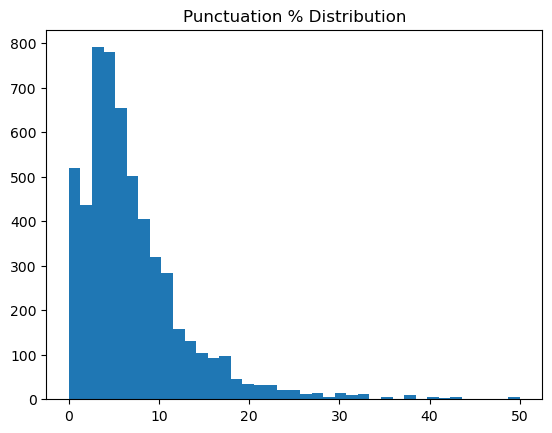

In [67]:
bins = np.linspace(0,50,40)

pyplot.hist(data['punct%'], bins) 
pyplot.title('Punctuation % Distribution')
pyplot.show() 

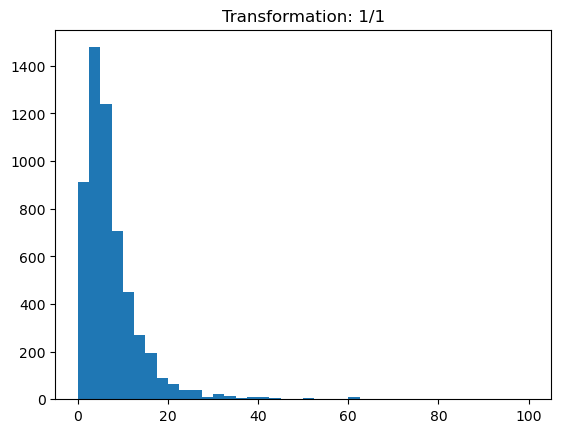

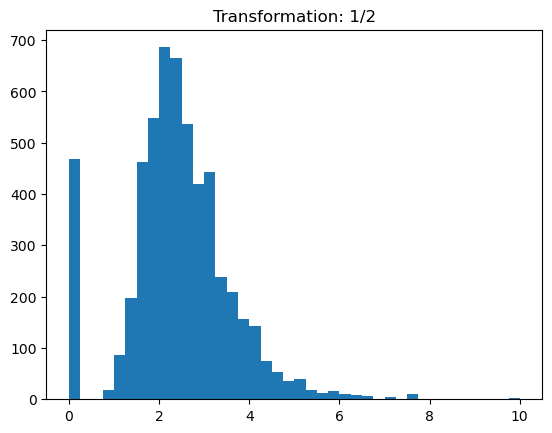

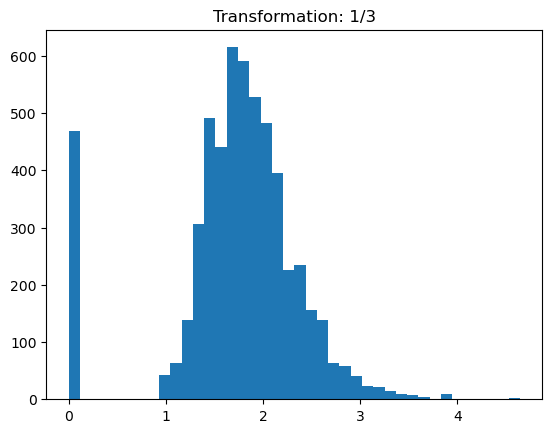

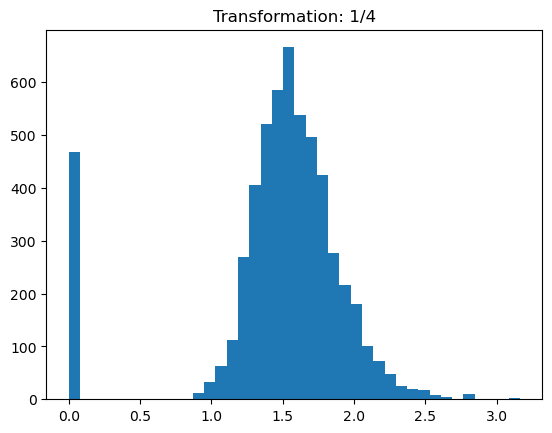

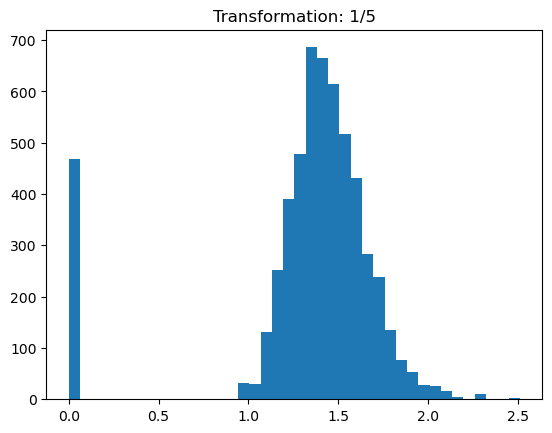

In [69]:
#bins = np.linspace(0,50,40)
for i in [1,2,3,4,5]:
    pyplot.hist(data['punct%']**(1/i), bins=40)
    pyplot.title('Transformation: 1/{}'.format(str(i)))
    pyplot.show() 

In [73]:
X_features = pd.concat([data['text_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis = 1)

In [74]:
X_features.head()

,text_len,punct%,0,1,2,3,4,5,6,7,...,8050,8051,8052,8053,8054,8055,8056,8057,8058,8059
0,92,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Explore RandomForestClassifier through Cross-Validation

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
print(dir(RandomForestClassifier))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_compute_oob_predictions', '_estimator_type', '_get_default_requests', '_get_metadata_request', '_get_oob_predictions', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score_and_attributes', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_params', '_validate_y_class_wei

In [77]:
from sklearn.model_selection import KFold, cross_val_score             #KFold - cross-validator

In [78]:
data['label'].head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [79]:
X= X_features.rename(str,axis="columns") #не фитится, если в названии столбцов не только string.

In [80]:
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X, data['label'], cv= k_fold, scoring = 'accuracy', n_jobs=-1)

array([0.97488789, 0.97757848, 0.97666068, 0.96409336, 0.97396768])

### Explore RandomForestClassifier through Holdout Set


In [81]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2)

In [99]:
X_train.shape

(4457, 8062)

In [100]:
y_train.shape

(4457,)

In [101]:
X_test.shape

(1115, 8062)

In [102]:
y_test.shape

(1115,)

In [103]:
rf = RandomForestClassifier(n_estimators = 50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [ ]:
#Mapping column names to random forest feature importances:

In [104]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.06111767148626858, '8038'),
 (0.05952438527433854, 'text_len'),
 (0.04925272746383982, '1789'),
 (0.04060340036225893, '7292'),
 (0.032722153454206454, '3118'),
 (0.02379537355131713, '4765'),
 (0.022706175787463204, '6976'),
 (0.021700509655382394, '5683'),
 (0.01812303696868779, '6236'),
 (0.0147775418445278, '2018')]

In [105]:
y_pred = rf_model.predict(X_test)#it will be an array of predictions for each element of the test set
precision, recall, fscore, support = score(y_test, y_pred, pos_label = 'spam', average='binary') 
#pos_label - to report metrics only for one label 'spam'(what we're interested on predicting)
#average = binary - Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

In [106]:
print('Precision: {} \nRecall: {} \nAccuracy: {} '.format(round(precision,3),
                                                            round(recall, 3),
                                                            round((y_pred==y_test).sum()/len(y_pred),3)))

Precision: 1.0 
Recall: 0.602 
Accuracy: 0.943 


### Building Machine Learning Classifiers: Explore Random Forest model with grid-search

**Grid-search:** Exhaustively search all parameter combinations in a given grid to determine the best model.
#max_depth = none - дерево будет строиться до тех пор, пока не будут минимизированы какие-то loss criterias

In [107]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [108]:
for n_est in [10,50,100]:
    for depth in [10,20,30,None]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.286 / Accuracy: 0.897
Est: 10 / Depth: 20 ---- Precision: 1.0 / Recall: 0.553 / Accuracy: 0.935
Est: 10 / Depth: 30 ---- Precision: 1.0 / Recall: 0.621 / Accuracy: 0.945
Est: 10 / Depth: None ---- Precision: 1.0 / Recall: 0.814 / Accuracy: 0.973
Est: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.261 / Accuracy: 0.893
Est: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.571 / Accuracy: 0.938
Est: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.72 / Accuracy: 0.96
Est: 50 / Depth: None ---- Precision: 0.993 / Recall: 0.832 / Accuracy: 0.975
Est: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.248 / Accuracy: 0.891
Est: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.571 / Accuracy: 0.938
Est: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.733 / Accuracy: 0.961
Est: 100 / Depth: None ---- Precision: 1.0 / Recall: 0.832 / Accuracy: 0.976


# Building Machine Learning Classifiers: Evaluate Random Forest with GridSearchCV

**Grid-search:** Exhaustively search all parameter combinations in a given grid to determine the best model.

**Cross-validation:** Divide a dataset into k subsets and repeat the holdout method k times where a different subset is used as the holdout set in each iteration.

In [121]:
X_counts_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150 rcv,150pday 6day,16 tsandc,20000 pound,2005 text,...,wonder bless,wont take,word back,word claim,word thank,world la,wwwdbuknet lccltd,xxx std,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150,150pday,...,wonder,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,å
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
data.head()

,label,text,text_clean,text_tokenized,text_nostop,text_stemmed,text_lemmatized,cleaned_text,text_len,punct%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]",go jurong point crazi avail bugi n great world la e buffet cine got amor wat,92,9.8
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...,128,4.7
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]",nah dont think goe usf live around though,49,4.1


In [206]:
data1 = pd.read_csv('/Users/alenadenisova/Desktop/spam 2.csv', encoding = "ISO-8859-1") #sep='\t', header=None
data1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [208]:
data1 = data1.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
data1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [209]:
data1.columns = ['label', 'text']
data1.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [211]:
data1['cleaned_text'] = data1['text'].apply(lambda x: clean_text_totext(x))
data1.head()

,label,text,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though


In [212]:
data1['text_len']=data1['text'].apply(lambda x:len(x)-x.count(" ")) #to count all non-whitespace characters
data1['punct%'] = data1['text'].apply(lambda x: count_punct(x))
data1.head()

,label,text,cleaned_text,text_len,punct%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",go jurong point crazi avail bugi n great world la e buffet cine got amor wat,92,9.8
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...,128,4.7
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though,49,4.1


In [124]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data['cleaned_text'])
#print(X_counts_.shape)
X_count_feat = pd.concat([data['text_len'], data['punct%'], X_counts_df], axis = 1)
X_count_feat.head()

,text_len,punct%,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150 rcv,150pday 6day,16 tsandc,...,wonder bless,wont take,word back,word claim,word thank,world la,wwwdbuknet lccltd,xxx std,xxxmobilemovieclub use,ye naughti
0,92,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
X_tfidf_feat = X_features
X_tfidf_feat.head()
X1= X_tfidf_feat.rename(str,axis="columns")

In [125]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param = {'n_estimators':[10, 150, 300], 
         'max_depth':[30, 60, 90, None]}
gs=GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X1, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,15.134950,0.358037,0.137096,0.020872,None,300,"{'max_depth': None, 'n_estimators': 300}",0.978475,0.974888,0.974865,0.971275,0.975763,0.975053,0.002305,1
8,17.416180,0.193521,0.494823,0.068099,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.975785,0.972197,0.976661,0.972172,0.974865,0.974336,0.001846,2
10,9.708901,0.221066,0.158117,0.046152,None,150,"{'max_depth': None, 'n_estimators': 150}",0.973094,0.974888,0.975763,0.972172,0.974865,0.974157,0.001318,3
7,8.939235,0.376606,0.175002,0.047335,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.978475,0.972197,0.975763,0.972172,0.972172,0.974156,0.002567,4
5,14.637778,0.160080,0.225788,0.050108,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.975785,0.972197,0.974865,0.968582,0.973968,0.973079,0.002542,5


In [226]:
X2= X_count_feat.rename(str,axis="columns")
gs=GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X2_clean, data1['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.648370,0.027536,0.029089,0.003847,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.895964,0.908520,0.899461,0.911131,0.911131,0.905242,0.006318,1
8,1.264345,0.064060,0.054945,0.004394,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.893274,0.909417,0.899461,0.910233,0.911131,0.904703,0.007103,2
2,1.286221,0.045029,0.052966,0.004577,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.895067,0.906726,0.897666,0.912029,0.911131,0.904524,0.006947,3
10,0.638450,0.019680,0.027433,0.005099,None,150,"{'max_depth': None, 'n_estimators': 150}",0.896861,0.911211,0.898564,0.908438,0.907540,0.904523,0.005716,4
6,0.052498,0.002387,0.004857,0.001432,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.895067,0.909417,0.894075,0.911131,0.911131,0.904164,0.007864,5


In [216]:
X2.head()

,text_len,punct%,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150 rcv,150pday 6day,16 tsandc,...,wonder bless,wont take,word back,word claim,word thank,world la,wwwdbuknet lccltd,xxx std,xxxmobilemovieclub use,ye naughti
0,92,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
X2.isna().sum()

text_len                     0
punct%                       0
09061701461 claim         5552
100 20000                 5552
100000 prize              5552
                          ... 
world la                  5552
wwwdbuknet lccltd         5552
xxx std                   5552
xxxmobilemovieclub use    5552
ye naughti                5552
Length: 228, dtype: int64

In [224]:
X2_clean = X2.fillna(0)

In [225]:
X2_clean.head()

,text_len,punct%,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150 rcv,150pday 6day,16 tsandc,...,wonder bless,wont take,word back,word claim,word thank,world la,wwwdbuknet lccltd,xxx std,xxxmobilemovieclub use,ye naughti
0,92,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
print(dir(GradientBoostingClassifier))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_initialized', '_check_n_features', '_check_params', '_clear_state', '_compute_partial_dependence_recursion', '_estimator_type', '_fit_stage', '_fit_stages', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_init_state', '_is_initialized', '_make_estimator', '_more_tags', '_parameter_constraints', '_raw_predict', '_raw_predict_init', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_paramete

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2)

In [87]:
X

,text_len,punct%,0,1,2,3,4,5,6,7,...,8050,8051,8052,8053,8054,8055,8056,8057,8058,8059
0,92,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39,15.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,132,6.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,30,6.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,48,14.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators = est, max_depth = max_depth, learning_rate = lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label = 'spam', average = 'binary')
    #if not assign results of score function to any variable, it will be thrown into the air; 
    #the variables to assign results of the score function should be in that exact order.
    print('Est: {} / Depth: {} / LR: {} .......Precision: {}/ Recall: {}/ Accuracy: {} '.format( 
        est, max_depth, lr, round(precision,3), round(recall,3), round((y_pred==y_test).sum()/len(y_pred),3)))

In [94]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 50 / Depth: 3 / LR: 0.01 .......Precision: 0.0/ Recall: 0.0/ Accuracy: 0.856 
Est: 50 / Depth: 3 / LR: 0.1 .......Precision: 0.944/ Recall: 0.727/ Accuracy: 0.954 
Est: 50 / Depth: 3 / LR: 1 .......Precision: 0.913/ Recall: 0.714/ Accuracy: 0.949 
Est: 50 / Depth: 7 / LR: 0.01 .......Precision: 1.0/ Recall: 0.006/ Accuracy: 0.857 
Est: 50 / Depth: 7 / LR: 0.1 .......Precision: 0.941/ Recall: 0.795/ Accuracy: 0.963 
Est: 50 / Depth: 7 / LR: 1 .......Precision: 0.921/ Recall: 0.795/ Accuracy: 0.961 


/Users/alenadenisova/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 50 / Depth: 11 / LR: 0.01 .......Precision: 0.0/ Recall: 0.0/ Accuracy: 0.856 
Est: 50 / Depth: 11 / LR: 0.1 .......Precision: 0.95/ Recall: 0.82/ Accuracy: 0.968 
Est: 50 / Depth: 11 / LR: 1 .......Precision: 0.93/ Recall: 0.826/ Accuracy: 0.966 
Est: 50 / Depth: 15 / LR: 0.01 .......Precision: 1.0/ Recall: 0.006/ Accuracy: 0.857 
Est: 50 / Depth: 15 / LR: 0.1 .......Precision: 0.943/ Recall: 0.82/ Accuracy: 0.967 
Est: 50 / Depth: 15 / LR: 1 .......Precision: 0.925/ Recall: 0.839/ Accuracy: 0.967 
Est: 100 / Depth: 3 / LR: 0.01 .......Precision: 0.935/ Recall: 0.447/ Accuracy: 0.916 
Est: 100 / Depth: 3 / LR: 0.1 .......Precision: 0.955/ Recall: 0.789/ Accuracy: 0.964 
Est: 100 / Depth: 3 / LR: 1 .......Precision: 0.921/ Recall: 0.72/ Accuracy: 0.951 
Est: 100 / Depth: 7 / LR: 0.01 .......Precision: 0.955/ Recall: 0.658/ Accuracy: 0.946 
Est: 100 / Depth: 7 / LR: 0.1 .......Precision: 0.942/ Recall: 0.807/ Accuracy: 0.965 
Est: 100 / Depth: 7 / LR: 1 .......Precision: 0.936/ Rec

In [ ]:
#red warning -precision couldnt be calculater, because the model didn't predict any single string as spam.

In [95]:
#Explore parameter settings using GridSearchCV

In [118]:
X_tfidf_feat=X_tfidf_feat.rename(str,axis="columns")

In [126]:
X_count_feat = X_count_feat.rename(str,axis="columns")

In [113]:
data['label']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [119]:
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [100, 150],
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
}
gs = GridSearchCV(gb, param, cv=5, n_jobs=-1)    
cv_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,117.458784,0.543262,0.125393,0.031499,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 150}",0.971300,0.981166,0.97307,0.970377,0.968582,0.972899,0.004380,1
1,79.593073,0.708394,0.113251,0.010079,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}",0.972197,0.975785,0.97307,0.972172,0.967684,0.972182,0.002608,2
2,77.072196,1.054398,0.117155,0.033204,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 100}",0.968610,0.982063,0.97307,0.968582,0.967684,0.972002,0.005370,3
0,49.334672,0.177222,0.142179,0.036337,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}",0.969507,0.978475,0.97307,0.969479,0.968582,0.971823,0.003665,4
5,132.048803,0.876057,0.084960,0.009695,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 150}",0.972197,0.977578,0.97307,0.967684,0.965889,0.971284,0.004140,5


In [132]:
X_count_feat.isna().sum()

text_len                     0
punct%                       0
09061701461 claim         5552
100 20000                 5552
100000 prize              5552
                          ... 
world la                  5552
wwwdbuknet lccltd         5552
xxx std                   5552
xxxmobilemovieclub use    5552
ye naughti                5552
Length: 228, dtype: int64

In [133]:
X_count_feat=X_count_feat.fillna(0)
X_count_feat.isna().sum()

text_len                  0
punct%                    0
09061701461 claim         0
100 20000                 0
100000 prize              0
                         ..
world la                  0
wwwdbuknet lccltd         0
xxx std                   0
xxxmobilemovieclub use    0
ye naughti                0
Length: 228, dtype: int64

In [134]:
gb = GradientBoostingClassifier()
param = {
    'n_estimators': [100, 150],
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
}
gs = GridSearchCV(gb, param, cv=5, n_jobs=-1)    
cv_fit = gs.fit(X_count_feat, data['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,1.585229,0.258658,0.007432,0.001241,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 100}",0.895964,0.906726,0.895871,0.909336,0.912926,0.904165,0.007016,1
0,1.184518,0.277645,0.008527,0.003018,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}",0.893274,0.911211,0.895871,0.908438,0.911131,0.903985,0.007793,2
1,1.824616,0.454507,0.007809,0.002056,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}",0.893274,0.907623,0.896768,0.909336,0.912029,0.903806,0.007392,3
3,2.478155,0.495905,0.010571,0.002283,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 150}",0.894170,0.904036,0.894075,0.907540,0.913824,0.902729,0.007695,4
5,2.156779,0.196622,0.009401,0.000386,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 150}",0.894170,0.907623,0.892280,0.909336,0.910233,0.902729,0.007828,5


#все, что выше, проведено с помощью cross-fold validation, когда весь обьем данные был показан модели, и каждый
#из пяти раз деления данные на train/test(holdout dataset) 20% выступали тестовыми значениями. 

#Vectorizers are like models: they need to be fit on the training dataset and then stored to
#transform the test set only. 
#when we say "fit" on the training set in the context of vectorizer = it basically stores all the words in the training set;
#then when in "transforms" the test set, it only creates columns for the words that were seen in the training set.
#The words of the test set that were not in the training set will not bshow up in the vectorized version of the test set.
#that is, vectorizer will only recognize words that were seen in training set.

Up to this point we were training the vectorizers on the entire set, because it makes things easier with the grid search.
Now, we'll:
1. Split the data into training and test set first;
2. train vectorizers on training set and use them to transform test set;
3. Fit best Random Forest model and Gradient Boosting model on the training set and predict on the test set.
4.  evaluate results of these 2 models to select best model. 

In [142]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data1 = pd.read_csv("/Users/alenadenisova/Desktop/spam 2.csv", encoding = "ISO-8859-1")
data1 = data1.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
data1.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data1['body_len'] = data1['body_text'].apply(lambda x: len(x) - x.count(" "))
data1['punct%'] = data1['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [143]:
data1.head()

,label,body_text,body_len,punct%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",92,9.8
1,ham,Ok lar... Joking wif u oni...,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
3,ham,U dun say so early hor... U c already then say...,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1


### Split into train/test

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1[['body_text', 'body_len', 'punct%']], data1['label'], test_size=0.2)

### Vectorize text


In [154]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text']) #by using 'fit' we just stored the columns with same names,
                                                    #they are not yet vectorized
tfidf_train = tfidf_vect_fit.transform(X_train['body_text']) #'fit.transform'vectorizers columns
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])  #same to perform on test set

#tfidf_train и tfidf_test are both sparce vectorized matrices
#tfidf_train и tfidf_test have the same number of columns,as they were transformed using same vectorizer that was trained on training set

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

#X_train is still keeping the indexex from the initiate set; new pandasDataFrame has new set of indexes;
#but the test messages are still in the same order. With 'reset_index(drop=True)' we drop old indexes, and now
#the index for X_train will match indexes for the newly created dataframe.
#axis=1 - we want to concatenate side by side

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,7166,7167,7168,7169,7170,7171,7172,7173,7174,7175
0,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,87,6.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,6.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Final evaluation of models

In [147]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [157]:
X_train_vect= X_train_vect.rename(str,axis="columns")
X_test_vect = X_test_vect.rename(str,axis="columns")

In [158]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start=time.time()
rf_model = rf.fit(X_train_vect, y_train)
end=time.time()
fit_time = end-start

start=time.time()
y_pred = rf_model.predict(X_test_vect)
end=time.time()
pred_time = end-start

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} / Precision: {} / Recall: {} / Accuracy: {}'.format(round(fit_time,3), round(pred_time,3),
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 1.061 / Predict time: 0.043 / Precision: 1.0 / Recall: 0.821 / Accuracy: 0.976


In [160]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start=time.time()
gb_model = gb.fit(X_train_vect, y_train)
end=time.time()
fit_time = end-start

start=time.time()
y_pred = gb_model.predict(X_test_vect)
end=time.time()
fit_time = end-start

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} / Precision: {} / Recall: {} / Accuracy: {}'.format(round(fit_time,3),round(pred_time,3),
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 0.072 / Predict time: 0.043 / Precision: 0.962 / Recall: 0.848 / Accuracy: 0.975
